# Crashes Madrid 2009

This notebook shows how to create a heatmap to summarize data related to crashed in Madrid during 2009.

Data source: [EMT OpenData](http://opendata.emtmadrid.es/)

In [1]:
#%load_ext watermark
%reload_ext watermark

%watermark -v -d -a "David Torres Pascual" -p pandas,matplotlib,seaborn

David Torres Pascual 2016-10-03 

CPython 3.5.2
IPython 4.2.0

pandas 0.18.1
matplotlib 1.5.1
seaborn 0.7.1


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('acc.xls', skiprows=7) # We skip the first lines because it contains useless information.
df = df.dropna(how='all')
df=df.rename(columns = {'Unnamed: 11':'TOTAL'})
df1 = df[:21] # Remove totals

In [4]:
col = df.columns[1:]

df2 = (df[col].T / df[col].TOTAL).T # This mathematical operation with the transposes allows us to obtain the percentages for each cell.
# For the previous task, we could also use the method applymap() from pandas library. 

df2.index = df['DISTRITO_ACCIDENTE']
del df2['TOTAL']

# Visualizations

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

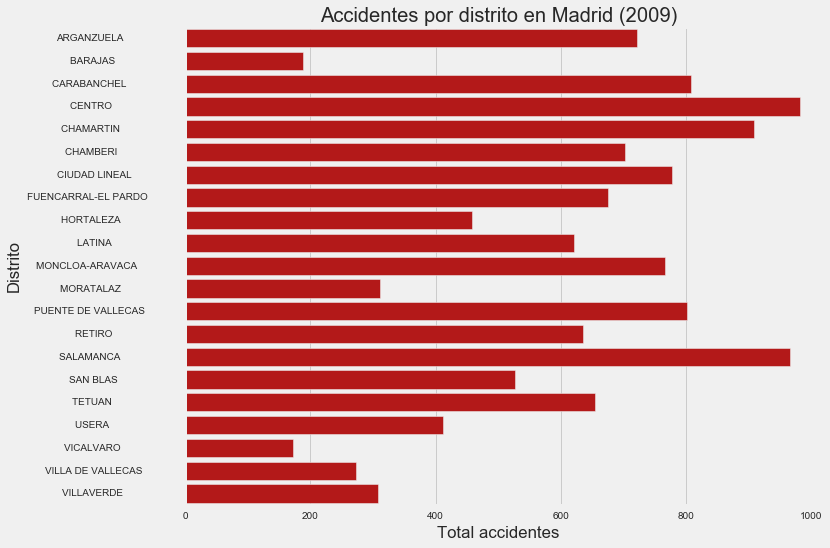

In [6]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,8))
ax = sns.barplot(x='TOTAL', 
            y='DISTRITO_ACCIDENTE', 
            data=df1, 
            color='#CC0000'
            )
ax.set(title='Accidentes por distrito en Madrid (2009)',
       xlabel='Total accidentes', 
       ylabel='Distrito')
plt.show()

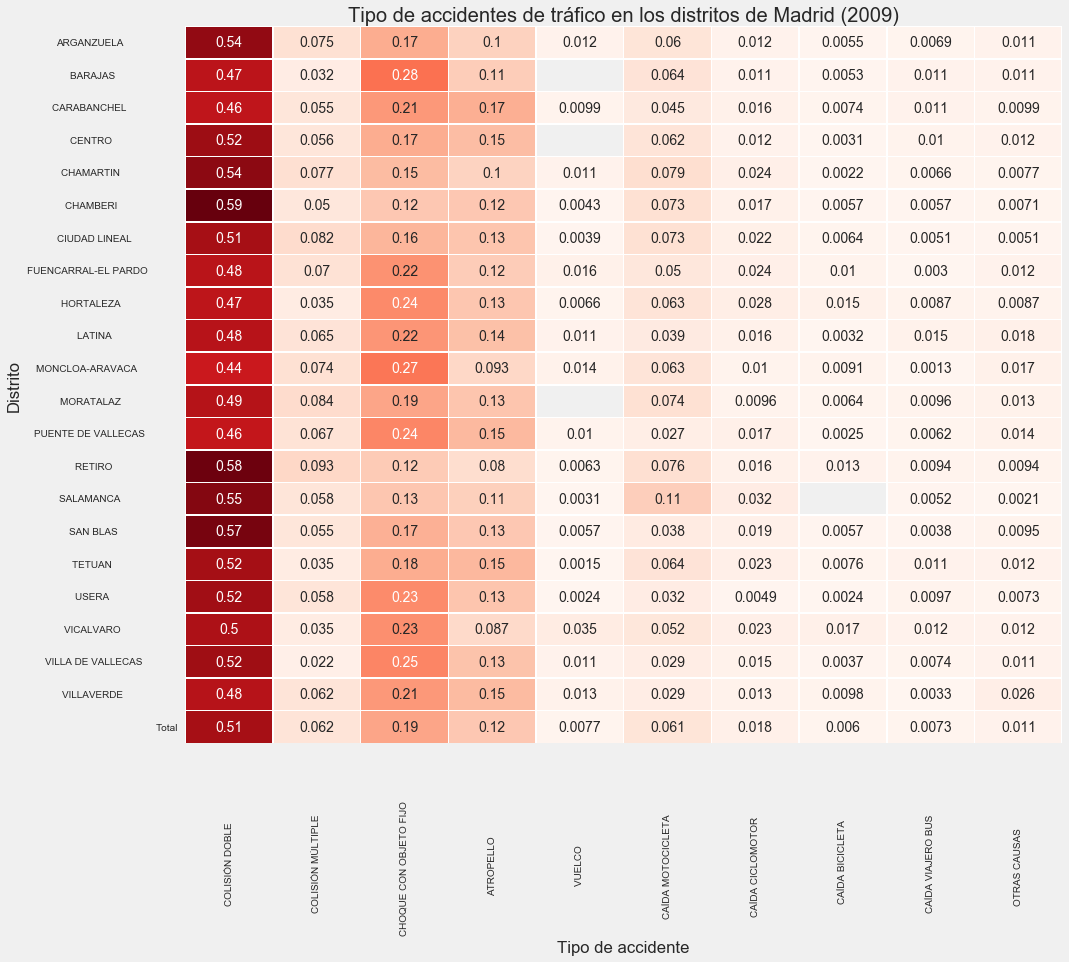

In [7]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(df2, 
                 annot=True, 
                 linewidths=.5, 
                 cmap='Reds', 
                 cbar=False)
ax.set(title='Tipo de accidentes de tráfico en los distritos de Madrid (2009)',
       xlabel='Tipo de accidente', 
       ylabel='Distrito')
plt.show()
#plt.savefig('hmap.png', dpi=200, bbox_inches='tight')